In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('1671752sales_results.csv')
print(df['product_category'].isna().sum(), df['product_category'].unique())

0 ['tools' 'small_electronics' 'household_appliances' 'personal_care']


In [106]:
# Part 1 a.
#cleaning the data set from NaN values
print(df.isna().sum())
df_clean = df.dropna()
print(df_clean.isna().sum())

#creating dummy variables
df_clean = pd.get_dummies(df_clean, columns=['product_category', 'influencer']).astype(int)
df_clean = pd.concat([df_clean], axis=1)
print(df_clean.describe(), df_clean.nunique(), df_clean.shape)




relative_sales             0
product_category           0
market_research          193
advertising               70
customer_satisfaction      0
influencer               133
competitors                0
shipping_time              0
dtype: int64
relative_sales           0
product_category         0
market_research          0
advertising              0
customer_satisfaction    0
influencer               0
competitors              0
shipping_time            0
dtype: int64
       relative_sales  market_research  advertising  customer_satisfaction  \
count     2326.000000      2326.000000  2326.000000            2326.000000   
mean         5.869733        14.555460    19.613500               3.696475   
std          7.101704         4.009899     4.951704               0.520426   
min        -38.000000         2.000000     2.000000               2.000000   
25%          2.000000        12.000000    16.000000               3.000000   
50%          6.000000        15.000000    20.000000       

In [107]:
import statsmodels.api as sm
import numpy as np
print(df_clean.describe())

# Part 1 b.
#defining independent variables X (features) and defining dependent variables y (target)
X = df_clean.drop(columns=['relative_sales'])
y = df_clean['relative_sales']

#constant for independent variables for the intercept in the model
X = sm.add_constant(X)

#fitting the model
model = sm.OLS(y, X).fit()
print(model.summary())

cooks_d = model.get_influence().cooks_distance
n = len(df_clean)

df_clean['Outlier'] = cooks_d[0] > 4/n


       relative_sales  market_research  advertising  customer_satisfaction  \
count     2326.000000      2326.000000  2326.000000            2326.000000   
mean         5.869733        14.555460    19.613500               3.696475   
std          7.101704         4.009899     4.951704               0.520426   
min        -38.000000         2.000000     2.000000               2.000000   
25%          2.000000        12.000000    16.000000               3.000000   
50%          6.000000        15.000000    20.000000               4.000000   
75%         10.000000        17.000000    23.000000               4.000000   
max         28.000000        28.000000    38.000000               5.000000   

       competitors  shipping_time  product_category_household_appliances  \
count  2326.000000    2326.000000                            2326.000000   
mean     -7.057610       2.168100                               0.380911   
std     109.528217       0.849863                               0.485

In [108]:
#Detecting the ouliers using cooks d and logic (we cant have illogical numbers), at first we are checking for them.
df_clean.describe()

#incomplete data cells
valid_indices = []

#function to check for impossible values
def check_impossible_values(data_point):
    return (
        data_point['competitors'] >= 0 and
        data_point['market_research'] <= 100 and
        1 <= data_point['customer_satisfaction'] <= 5 and
        data_point['shipping_time'] > 0
    )

# Iterate through the data points
for i in range(len(df_clean)):
    single_data_point = df_clean.iloc[i]
    if check_impossible_values(single_data_point):
        valid_indices.append(i)

#create a DataFrame with data points containing valid values
df_clean_valid = df_clean.iloc[valid_indices]

#display the DataFrame with valid data points
print(df_clean_valid, df_clean_valid.dtypes)

      relative_sales  market_research  advertising  customer_satisfaction  \
0                  8               13           26                      3   
1                  3               12           18                      4   
3                  5               17           24                      4   
4                 -5               23           18                      4   
5                  3               17           18                      4   
...              ...              ...          ...                    ...   
2695              12               13           24                      4   
2696               7               14           12                      4   
2697               8               13           17                      4   
2698               8               17           20                      4   
2699               9               10           27                      4   

      competitors  shipping_time  product_category_household_appliances  \


In [109]:
X = df_clean_valid.drop(columns=['relative_sales']).astype(float)
y = df_clean_valid['relative_sales']
#constant for independent variables for the intercept in the model
X = sm.add_constant(X)

#fitting the model after removing impossible values
model_valid = sm.OLS(y, X).fit()
print(model_valid.summary(), df_clean_valid.isna().sum())



                            OLS Regression Results                            
Dep. Variable:         relative_sales   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     449.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:32:58   Log-Likelihood:                -6512.5
No. Observations:                2298   AIC:                         1.305e+04
Df Residuals:                    2287   BIC:                         1.311e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [110]:
#Creating a copy
df_clean_no_cooksD_outliers = df_clean_valid.copy()
#keeping rows those that are not outliers
df_clean_no_cooksD_outliers = df_clean_no_cooksD_outliers[df_clean_no_cooksD_outliers['Outlier'] == False]
#making booleans into flot numbers and splitting into dependent and independent variable
X_no_cooksD_outliers = df_clean_no_cooksD_outliers.drop(columns=['relative_sales']).astype(float)
y_no_cooksD_outliers = df_clean_no_cooksD_outliers['relative_sales']
X_no_cooksD_outliers = sm.add_constant(X_no_cooksD_outliers)
#fitting the model
model_no_cooksD_outliers = sm.OLS(y_no_cooksD_outliers, X_no_cooksD_outliers).fit()
print("Model Summary after Removing Cook's D Outliers")
print(model_no_cooksD_outliers.summary())
#According to this the removing of Cook's D Outliers R-squared decreases, this mens that from this point I will be using only df_clean_valid data frame
#and we will keep the outliers which are determined by cooksD apporach

Model Summary after Removing Cook's D Outliers
                            OLS Regression Results                            
Dep. Variable:         relative_sales   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     382.1
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:32:58   Log-Likelihood:                -6091.0
No. Observations:                2202   AIC:                         1.220e+04
Df Residuals:                    2192   BIC:                         1.226e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

/Users/karolisliubavicius/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [111]:
df_clean_valid.shape, df_clean_no_cooksD_outliers.shape

((2298, 13), (2202, 13))

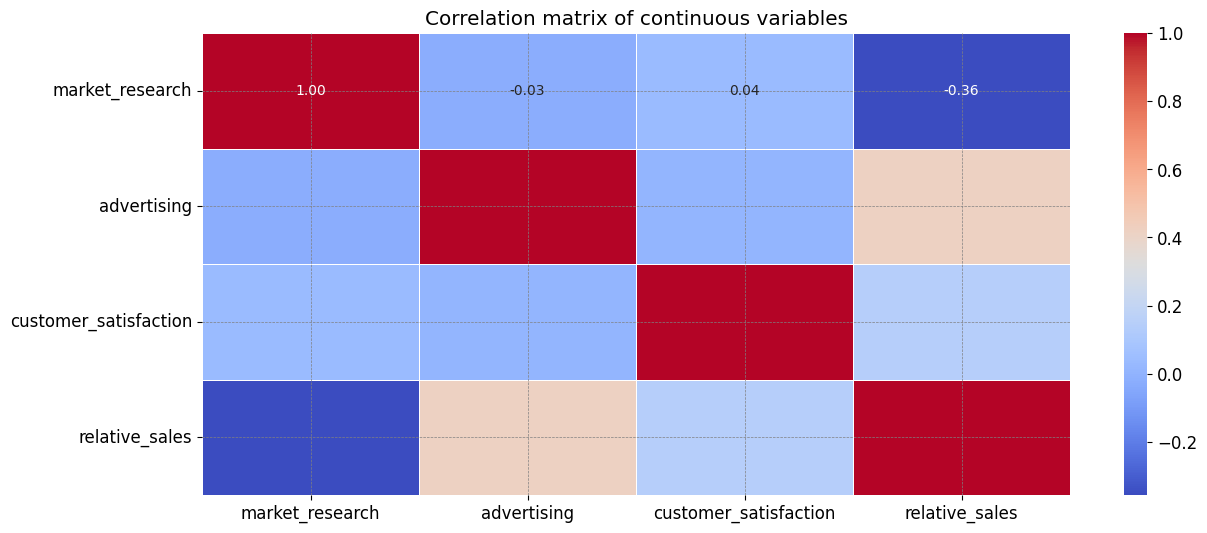

In [112]:
#Part 1 c
cont_vars = [
    'market_research',
    'advertising', 
    'customer_satisfaction', 
    'relative_sales'
    ]

corr_matrix = df_clean_valid[cont_vars].corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={'fontsize': 10}, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix of continuous variables")
plt.show()
#After inspecting the correlation matrix< i can state that there is low or not significant enough correlation within continuous variables

In [113]:
print(corr_matrix)

                       market_research  advertising  customer_satisfaction  \
market_research               1.000000    -0.026528               0.035586   
advertising                  -0.026528     1.000000               0.005363   
customer_satisfaction         0.035586     0.005363               1.000000   
relative_sales               -0.356317     0.419391               0.144263   

                       relative_sales  
market_research             -0.356317  
advertising                  0.419391  
customer_satisfaction        0.144263  
relative_sales               1.000000  


In [114]:
#checking for possible multicollinearity issues, the outcome there is low or almost none possibility for a multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_clean_valid[['market_research', 'advertising', 'customer_satisfaction', 'relative_sales']]

X = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

#check for multicolinearity, this indicates that multicollinearity doesnt exist in the model since it is < 5

                Variable        VIF
0                  const  79.620603
1        market_research   1.182852
2            advertising   1.246682
3  customer_satisfaction   1.036385
4         relative_sales   1.468399


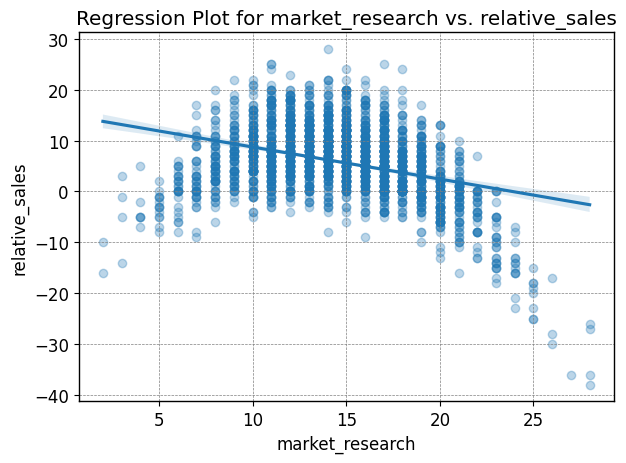

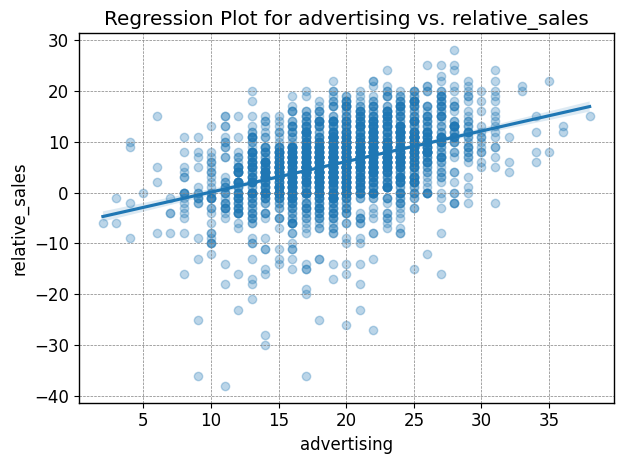

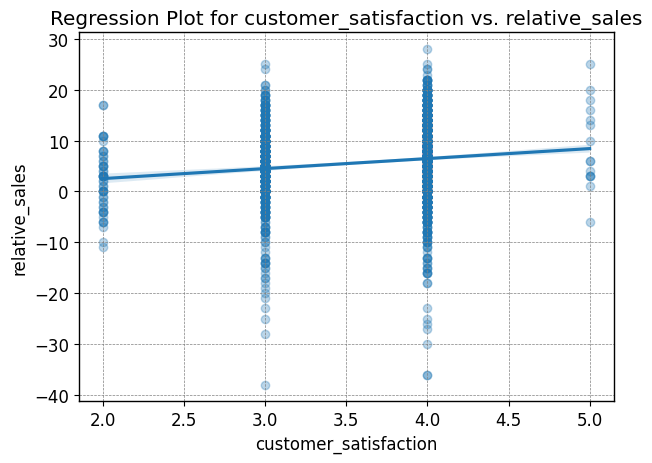

In [115]:
#Part 1d
independent_variables = ['market_research', 'advertising', 'customer_satisfaction']
dependent_variable = 'relative_sales'
#plot all continuous variables to check for linearity
for var in independent_variables:
    sns.regplot(x=var, y=dependent_variable, data=df_clean_valid, scatter_kws={"alpha":0.3})
    plt.title(f'Regression Plot for {var} vs. {dependent_variable}')
    plt.tight_layout()
    plt.show()

#The regeression in this case negative, this means the higher expneses or market research are the less in brings to the company

In [116]:
#apply square root transformation to 'market_research' because the relationship seems qudratic others (competitors, advertising) are linear
df_clean_valid['market_research_sqrt'] = df_clean_valid['market_research'] ** 2

/var/folders/m1/102781ks0r1_r6_vtplwmzy00000gn/T/ipykernel_3886/2093183772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_valid['market_research_sqrt'] = df_clean_valid['market_research'] ** 2


In [117]:
from sklearn.preprocessing import PolynomialFeatures
#Exploring the best fitting models
#checking last time for the null_values
print(df_clean_valid.isnull().sum())
#model from 1b linear model
print(model_valid.summary())

#polynominal model including independent variable shipping time
X_polynomial = df_clean_valid.drop(columns=['relative_sales']).astype(float)
y_polynomial = df_clean_valid['relative_sales']
X_polynomial = sm.add_constant(X_polynomial)
model_polynomial = sm.OLS(y_polynomial, X_polynomial).fit()
print(model_polynomial.summary())

#same polynominal with dropped shipping_time and since it is not significant (final)
X_polynomial_2 = df_clean_valid.drop(columns=['relative_sales', 'shipping_time']).astype(float)
y_polynomial_2 = df_clean_valid['relative_sales']
X_polynomial_2 = sm.add_constant(X_polynomial_2)
model_polynomial_2 = sm.OLS(y_polynomial_2, X_polynomial_2).fit()
print(model_polynomial_2.summary())

relative_sales                           0
market_research                          0
advertising                              0
customer_satisfaction                    0
competitors                              0
shipping_time                            0
product_category_household_appliances    0
product_category_personal_care           0
product_category_small_electronics       0
product_category_tools                   0
influencer_no                            0
influencer_yes                           0
Outlier                                  0
market_research_sqrt                     0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:         relative_sales   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     449.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          

In [120]:
#Part 2c
product_relative_sales = pd.DataFrame({
    'const': [0],
    'market_research_sqrt': [0],
    'market_research': [17],
    'advertising': [18],
    'customer_satisfaction': [4.3],
    'influencer_no': [1],
    'influencer_yes': [0],
    'competitors': [3],
    'product_category_household_appliances': [1],
    'product_category_personal_care': [0],
    'product_category_small_electronics': [0],
    'product_category_tools': [0],
    'Outlier': [0]
})

predicted_relative_sales = model_polynomial_2.predict(product_relative_sales)
print("Predicted Relative Sales for the product: ", round(predicted_relative_sales, 3))

Predicted Relative Sales for the product:  0    22.385
dtype: float64


In [130]:
#Part 2d
from fancyimpute import IterativeImputer

df_2d = df.copy()

print(df_2d.isna().sum(), df_2d.shape)

#convert categorical variables to dummy variables
df_2d = pd.get_dummies(df_2d, columns=['product_category', 'influencer'])


numerical_columns = df_2d.select_dtypes(exclude=['object', 'bool']).columns
# Impute numerical variables
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df_2d[numerical_columns]), columns=numerical_columns)

# Display imputed DataFrame
print(df_imputed.isna().sum(), df_imputed.shape)





relative_sales                           0
market_research                          0
advertising                              0
customer_satisfaction                    0
competitors                              0
shipping_time                            0
product_category_household_appliances    0
product_category_personal_care           0
product_category_small_electronics       0
product_category_tools                   0
influencer_no                            0
influencer_yes                           0
dtype: int64 (2700, 12)


In [122]:
X = df_imputed.drop(columns=['relative_sales']).astype(float)
y = df_imputed['relative_sales']

X = sm.add_constant(X)

model_imputed = sm.OLS(y, X).fit()

print("Non-Imputed Model Summary from part 1:")
print(model_polynomial_2.summary())
print("\nImputed Model Summary:")
print(model_imputed.summary())



Non-Imputed Model Summary from part 1:
                            OLS Regression Results                            
Dep. Variable:         relative_sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1023.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:32:59   Log-Likelihood:                -5809.1
No. Observations:                2298   AIC:                         1.164e+04
Df Residuals:                    2287   BIC:                         1.170e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [123]:
df_imputed['market_research_sqrt'] = df_imputed['market_research'] ** 2

In [124]:
#creating NaN imputed model
X_polynomial_2d = df_imputed.drop(columns=['relative_sales', 'shipping_time']).astype(float)
y_polynomial_2d = df_imputed['relative_sales']
X_polynomial_2d = sm.add_constant(X_polynomial_2d)
model_polynomial_2d = sm.OLS(y_polynomial_2d, X_polynomial_2d).fit()
print('Final model with no imputed values\n', model_polynomial_2.summary())
print('Model with imputed values\n', model_polynomial_2d.summary())

Final model with no imputed values
                             OLS Regression Results                            
Dep. Variable:         relative_sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1023.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:32:59   Log-Likelihood:                -5809.1
No. Observations:                2298   AIC:                         1.164e+04
Df Residuals:                    2287   BIC:                         1.170e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [125]:
from stargazer.stargazer import Stargazer, LineLocation
from IPython.core.display import HTML
 #model polynominal 2 is the final miodel without shipping time and highest r-sqaured
Table = Stargazer([model, model_valid, model_no_cooksD_outliers, model_polynomial, model_polynomial_2])
Table.title('Models Predicting Changes in Sales') #Give it a title   
Table.custom_columns(['Primary model', 'Model without illigocal values', 'Model without Cooks D outliers', 'Model with polynomial relationships', 'Final Model'], [1, 1, 1, 1, 1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['const','market_research','market_research_sqrt', 'shipping_time','advertising','customer_satisfaction','competitors','product_category_household_appliances','product_category_personal_care','product_category_small_electronics', 'product_category_tools', 'influencer_no', 'influencer_yes']) #reorder variables
Table.rename_covariates({'const':'const', #Rename relevant Variables
                        'market_research':'Market Research',
                        'arket_research_sqrt': 'Market Reserach^2',
                        'shipping_time':'Shipping time',
                        'advertising':'Advertising',
                        'customer_satisfaction':'Customer Satisfaction',
                        'competitors':'Competitors',
                        'product_category_household_appliances':'Houshold products',
                        'product_category_personal_care':'Personal Care products',
                        'product_category_small_electronics':'Small Electronics',
                        'product_category_tools':'Tools',
                        'influencer_no':'Influencer No',
                        'influencer_yes':'Influencer Yes'
                        })
Table.add_custom_notes(['All continuous variables have not been standardized']) #Add note about standardization
Table.custom_note_label('') #Remove the word "Note:" 
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom
HTML(Table.render_html())



In [126]:
html_code = Table.render_html()

# Specify the file path where you want to save the HTML
file_path = '/Users/karolisliubavicius/Desktop/PC files/university/Year 3/DATA modelling/deliverable/table.html'

# Save the HTML code to the file
with open(file_path, 'w') as file:
    file.write(html_code)

print(f"Table HTML saved to {file_path}")

Table HTML saved to /Users/karolisliubavicius/Desktop/PC files/university/Year 3/DATA modelling/deliverable/table.html


In [129]:
from stargazer.stargazer import Stargazer, LineLocation
from IPython.core.display import HTML
 #model polynominal 2 is the final miodel without shipping time and highest r-sqaured
Table = Stargazer([model_polynomial_2, model_polynomial_2d])
Table.title('Models Predicting Changes in Sales') #Give it a title   
Table.custom_columns(['Final Model', 'Model with imputed NaN'], [1, 1]) #Give the models names
Table.show_model_numbers(False) #Remove model number
Table.significant_digits(2) #Change decimals to 2
Table.covariate_order(['const','market_research','market_research_sqrt','advertising','customer_satisfaction','competitors','product_category_household_appliances','product_category_personal_care','product_category_small_electronics', 'product_category_tools', 'influencer_no', 'influencer_yes']) #reorder variables
Table.rename_covariates({'const':'const', #Rename relevant Variables
                        'market_research':'Market Research',
                        'arket_research_sqrt': 'Market Reserach^2',
                        'shipping_time':'Shipping time',
                        'advertising':'Advertising',
                        'customer_satisfaction':'Customer Satisfaction',
                        'competitors':'Competitors',
                        'product_category_household_appliances':'Houshold products',
                        'product_category_personal_care':'Personal Care products',
                        'product_category_small_electronics':'Small Electronics',
                        'product_category_tools':'Tools',
                        'influencer_no':'Influencer No',
                        'influencer_yes':'Influencer Yes'
                        })
Table.add_custom_notes(['All continuous variables have not been standardized']) #Add note about standardization
Table.custom_note_label('') #Remove the word "Note:" 
Table.show_degrees_of_freedom(False) #Remove the degrees of freedom
HTML(Table.render_html())

html_code = Table.render_html().replace('<table', f'<table style="width:40%"')

# Specify the file path where you want to save the HTML
file_path = '/Users/karolisliubavicius/Desktop/PC files/university/Year 3/DATA modelling/deliverable/nonimputed_imputed.html'

# Save the HTML code to the file
with open(file_path, 'w') as file:
    file.write(html_code)

print(f"Table HTML saved to {file_path}")

Table HTML saved to /Users/karolisliubavicius/Desktop/PC files/university/Year 3/DATA modelling/deliverable/nonimputed_imputed.html
